#                                           Supermarket Sales Analysis Predictive Modelling

#                                                  PROJECT OBJECTIVE
The objective of this project is to analyze supermarket sales data to uncover key business insights related to customeer behavior, product performance,
and sales trends across different branches. Additionally, the project builds a simple predictive model to estimate gross income based on product pricing and 
quantity sold. The goal is to help supermarket management improve strategicdecisions regaeding marketing, inventory planning, staffing and experience.

Dataset Description
The dataset used in this analysis is the Supermarket Sales Dataset from Kaggle. It contains 1000 transactions recorded across three branches (A,B and C).
The data spans multiple product lines and includes detailed fields such as:
Invoice ID
Branch & City
Customer Type(Member/Normal)
Gender
Product Line
Unit Price
Quantity Purchased
Tax (5%)
Gross Income
Rating
Payment Method (Cash, Ewallet, Credit Card)
Date & Time of Purchase
Sales (Total amount paid)

After preprocessing, additional time-based features were created

Day
Month
Year
Weekday
Hour (for time-of-day analysis)

This enriched dataset supportsrevenue analysis, customer segmentation, and trend identification.


#                                 KEY BUSINESS QUESTIONS TO ANSWER
The dataset was analyzed to answer various questions namely:
1. Which branch generates the highest sales revenue?
To determine performance differences across branches (A, B,C)

2. Which product lines contribute most to total revenue?
Identifies high-performing and low-performing product categories.

3. How do customer types (Members vs. Normal) impact revenue?
Reveals whether loyalty programs or recurring customers drive more income.

4. What payment methods are most commonly used?
Helps optimize POS processes and understand customer preference.

5. What are the hourly and daily sales trends?
The following were determined: (i). Peak shopping hours  (ii). Busiest days (iii). Strategic staffing and promotion oppotunities

6. What factors have the strongest correlation with gross income?
Shows which features (quantity, unit price etc.) most affect profitability.

7. Can a simple model be built to predict gross income?
A linear regression model is used to:
    Predict gross income
    Evaluate accuracy using MAE and r2
    Understand the relationship between sales variables

8. Are there any patterns or anomalies visible through residuals or predictions?
This checks model health and flags unusual transactions.

In [1]:
#2      Importing the necessary libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#3      Load the Dataset     
df = pd.read_csv("SuperMarket_sales.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [2]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
#4                       DATA CLEANING AND PREPROCESSING

#  converting date/time columns
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p')
df['Hour'] = df['Time'].dt.hour
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10


In [4]:
#          creation of new features: Day, Month, Year and Weekday

df['Time_dt'] = pd.to_datetime(df['Time'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.day_name()

In [5]:
##  5                          EXPLORATORY DATA ANALYSIS (EDA)

#   5.1 Sales by Branch

branch_sales = df.groupby('Branch')['Sales'].sum()
branch_sales

Branch
Alex     106200.3705
Cairo    106197.6720
Giza     110568.7065
Name: Sales, dtype: float64

In [7]:
# Engineering the dataset so as to facilitate analysis
branch_df = branch_sales.reset_index()
branch_df.columns = ['Branch', 'Sales']
branch_df

,Branch,Sales
0,Alex,106200.3705
1,Cairo,106197.6720
2,Giza,110568.7065


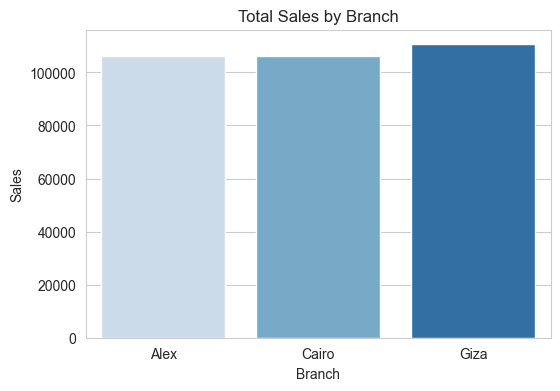

In [8]:
sns.set_style('whitegrid')

plt.figure(figsize=(6, 4))
sns.barplot(
data=branch_df, 
x='Branch', 
y='Sales',
hue='Branch',
palette='Blues',
legend=False
)
plt.title('Total Sales by Branch')
plt.ylabel('Sales')
plt.xlabel('Branch')
plt.show()

In [9]:
# Sales by Product Line. what product_line generates the highest revenue

product_sales = df.groupby('Product line')['Sales'].sum().sort_values(ascending=False)
product_sales

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Sales, dtype: float64

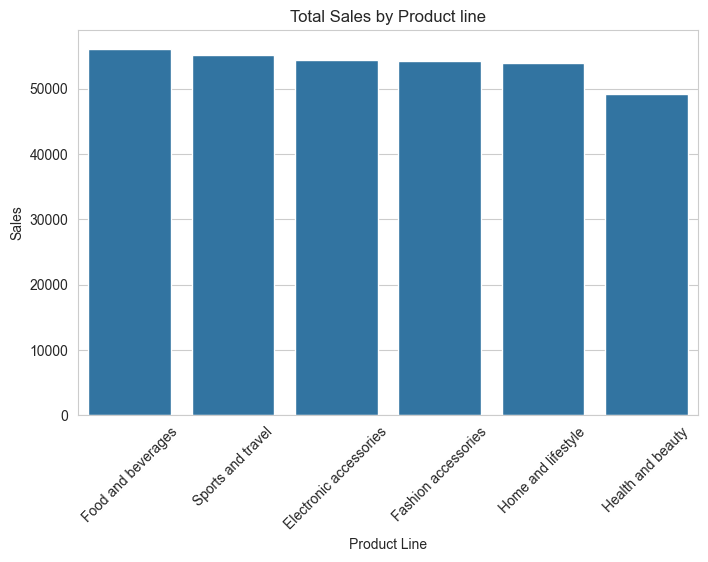

In [10]:
#              Visualization of key findings to reveal useful trends

plt.figure(figsize=(8,5))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.xticks(rotation=45)
plt.title('Total Sales by Product line')
plt.ylabel('Sales')
plt.xlabel('Product Line')
plt.show()

In [11]:
#          CUSTOMER TYPE ANALYSIS.

customer_sales = df.groupby('Customer type')['Sales'].sum().sort_values(ascending=False)
customer_sales

Customer type
Member    189694.764
Normal    133271.985
Name: Sales, dtype: float64

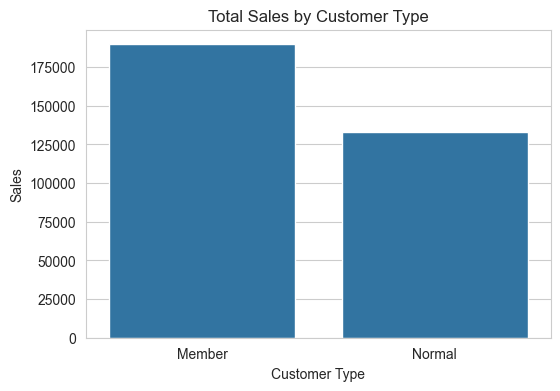

In [12]:
plt.figure(figsize=(6,4))
sns.barplot(
x=customer_sales.index,
y=customer_sales.values)
plt.title('Total Sales by Customer Type')
plt.ylabel('Sales')
plt.xlabel('Customer Type')
plt.show()

In [13]:
#                        PAYMENT TYPE ANALYSIS

payment_sales = df.groupby('Payment')['Sales'].sum().sort_values(ascending=False)
payment_sales

Payment
Cash           112206.570
Ewallet        109993.107
Credit card    100767.072
Name: Sales, dtype: float64

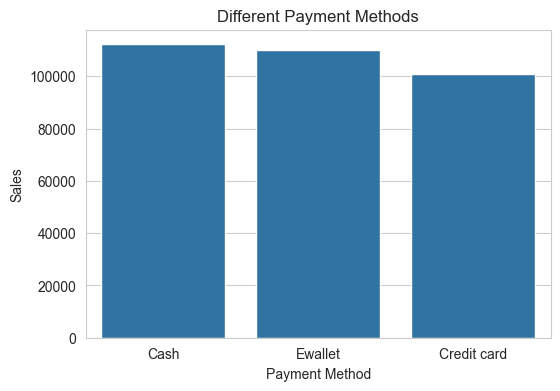

In [14]:
# A visualization of the most effective payment methods

plt.figure(figsize=(6,4))
sns.barplot(
x=payment_sales.index,
y=payment_sales.values
)
plt.title("Different Payment Methods")
plt.ylabel('Sales')
plt.xlabel('Payment Method')
plt.show()

In [15]:
#                  HOURLY SALES TREND

hour_sales = df.groupby('Hour')['Sales'].sum().sort_values(ascending=False)
print("Hour with highest sales:", hour_sales)

Hour with highest sales: Hour
19    39699.5130
13    34723.2270
10    31421.4810
15    31179.5085
14    30828.3990
11    30377.3295
12    26065.8825
18    26030.3400
16    25226.3235
17    24445.2180
20    22969.5270
Name: Sales, dtype: float64


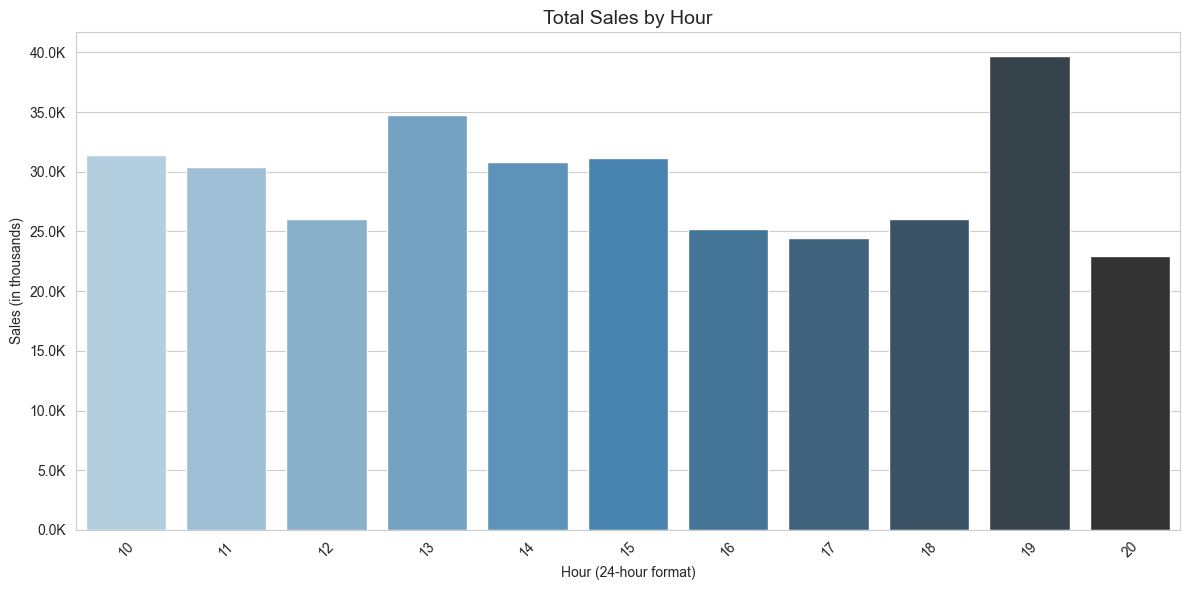

In [16]:
import matplotlib.ticker as mticker

hour_sales_df = hour_sales.reset_index()
hour_sales_df.columns = ['Hour', 'Sales']

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=hour_sales_df,
    x='Hour',
    y='Sales',
    hue='Hour',            # required to avoid the deprecation warning
    palette='Blues_d',
    legend=False           # hide legend since hue = Hour duplicates info
)
ax.yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, pos: f"{x/1000:.1f}K")
)
# Make hour labels readable
plt.xticks(rotation=45)

plt.title("Total Sales by Hour", fontsize=14)
plt.ylabel("Sales (in thousands)")
plt.xlabel("Hour (24-hour format)")

plt.tight_layout()
plt.show()

In [17]:
#                      CORRELATION HEATMAP

df['DayName'] = df['Date'].dt.day_name()
weekday_order = [
    'Monday','Tuesday',
    'Wednesday','Thursday',
    'Friday','Saturday', 'Sunday'
]

In [18]:
sales_heatmap = df.pivot_table(
    index='DayName',
    columns='Hour',
    values='Sales',
    aggfunc='sum',
    fill_value=0
)

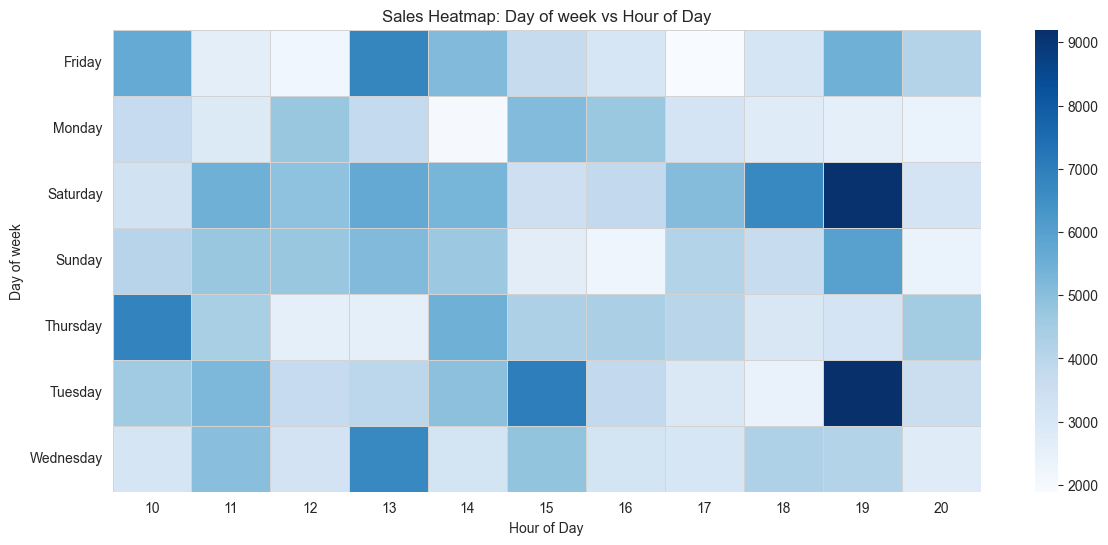

In [19]:
plt.figure(figsize=(14, 6))
sns.heatmap(
    sales_heatmap, 
    cmap='Blues',
    linewidths=.5,
    linecolor='lightgray'
)
plt.title('Sales Heatmap: Day of week vs Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of week')
plt.yticks(rotation=0)
plt.show()

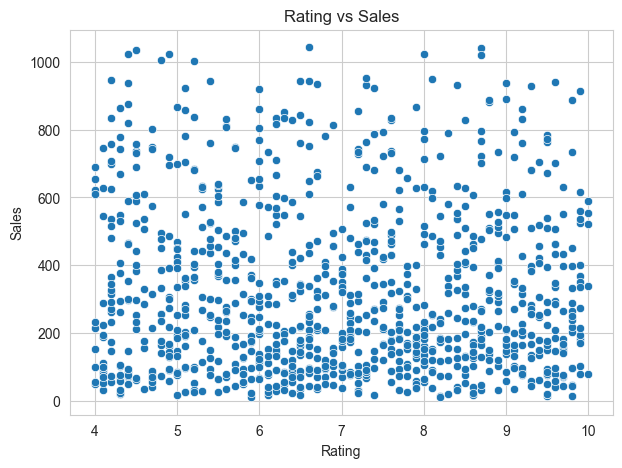

In [20]:
#                                       FEATURE ENGINEERING

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, 
                x='Rating',
                y='Sales')
plt.title('Rating vs Sales')
plt.xlabel('Rating')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

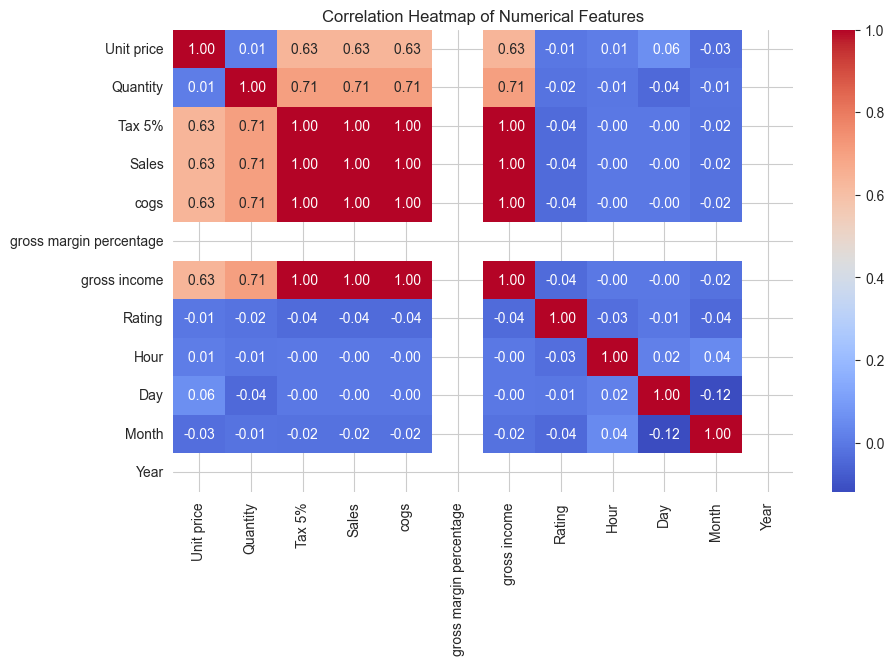

In [21]:
#                 CORRELATION HEATMAP


plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True,
cmap='coolwarm', fmt=" .2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

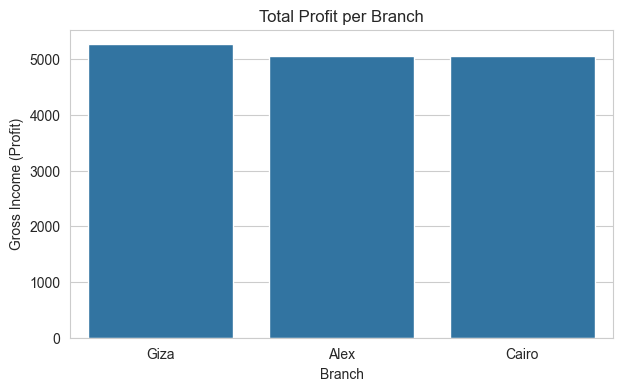

In [24]:
##                Profit by Branch

branch_profit = df.groupby('Branch')['gross income'].sum().sort_values(ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(
    x=branch_profit.index,
    y=branch_profit.values)
plt.title('Total Profit per Branch')
plt.ylabel('Gross Income (Profit)')
plt.show()

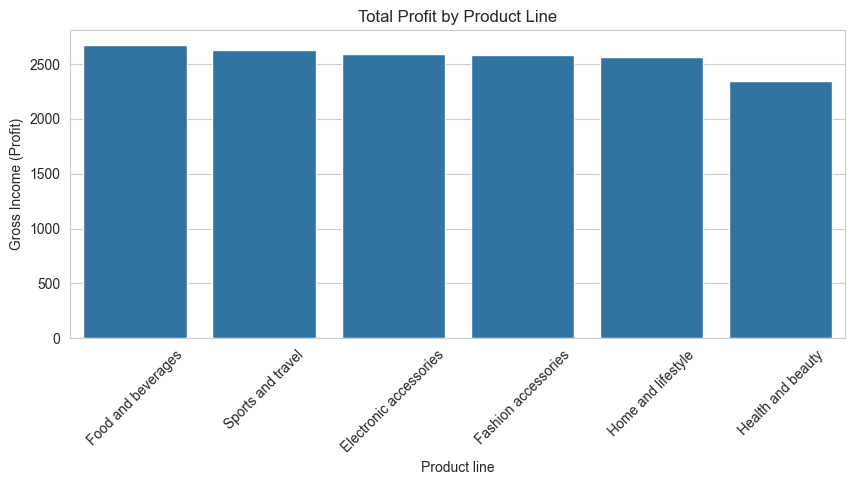

In [25]:
product_profit = df.groupby('Product line')['gross income'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(x=product_profit.index,
            y=product_profit.values)
plt.title('Total Profit by Product Line')
plt.xticks(rotation=45)
plt.ylabel('Gross Income (Profit)')
plt.show()

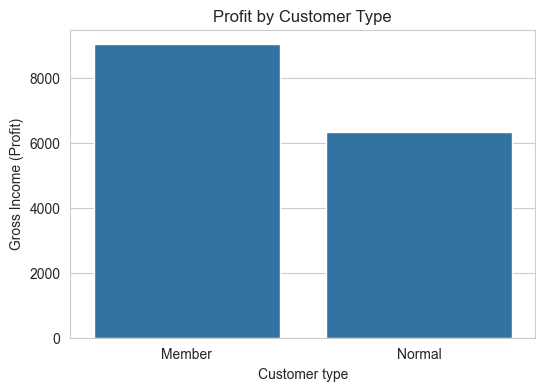

In [26]:
#                                       PROFIT BY CUSTOMER TYPE

customer_profit = df.groupby('Customer type')['gross income'].sum()

plt.figure(figsize=(6,4))
sns.barplot(
    x=customer_profit.index,
    y=customer_profit.values)
plt.title('Profit by Customer Type')
plt.ylabel('Gross Income (Profit)')
plt.show()

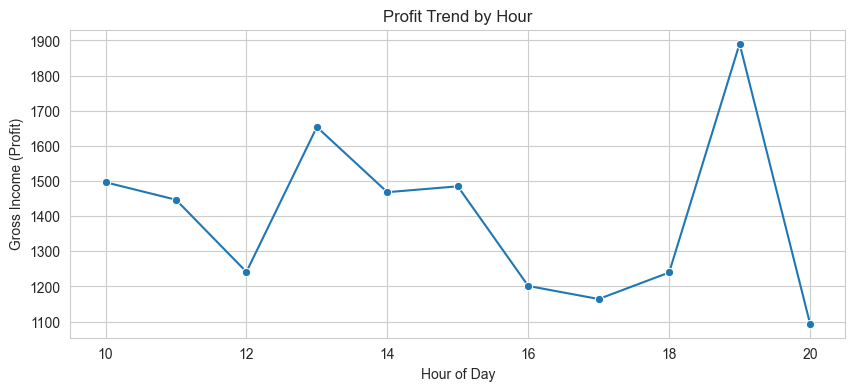

In [27]:
##     Proit Trend by Hour of the ay

hour_profit = df.groupby('Hour')['gross income'].sum()

plt.figure(figsize=(10,4))
sns.lineplot(x=hour_profit.index, y=hour_profit.values,
    marker='o')
plt.title('Profit Trend by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Gross Income (Profit)')
plt.grid(True)
plt.show()

In [ ]:
##     Profit vs Rating

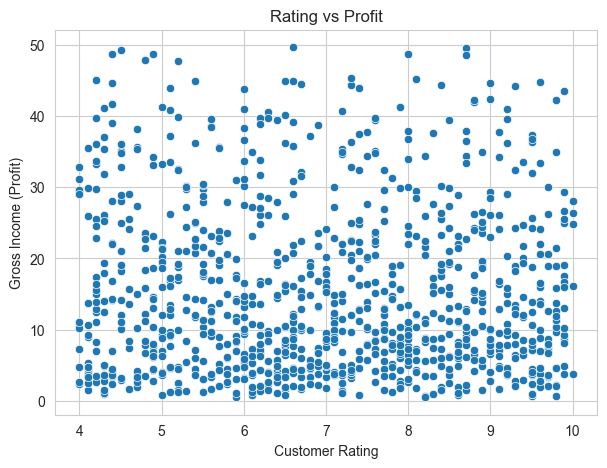

In [55]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Rating', y='gross income')
plt.title('Rating vs Profit')
plt.xlabel('Customer Rating')
plt.ylabel('Gross Income (Profit)')
plt.grid(True)
plt.show()

In [ ]:
##    Advanced Time-Series Insights

In [ ]:
##     Monthly Sales Trend

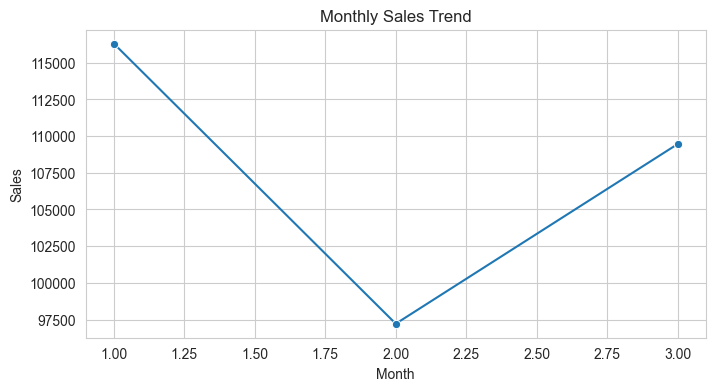

In [56]:
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(8,4))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [ ]:
##     Sales by Day of the Week

In [58]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday',]
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)

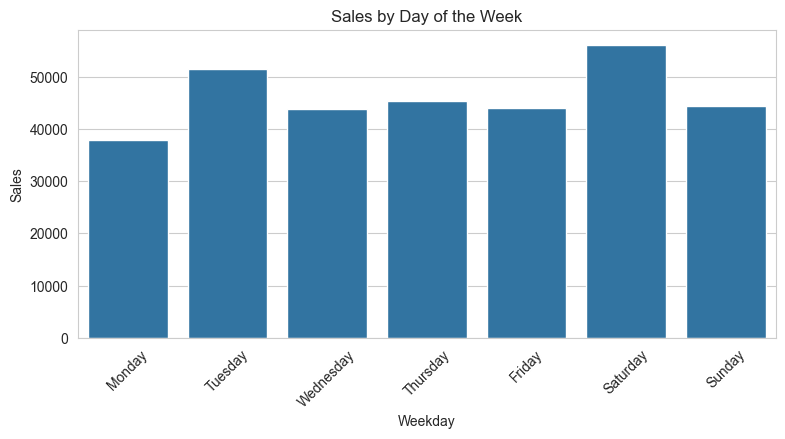

In [60]:
weekday_sales = df.groupby('Weekday', observed=False)['Sales'].sum().sort_values()
plt.figure(figsize=(9,4))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values)
plt.title('Sales by Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
##    Sales Trend over Time

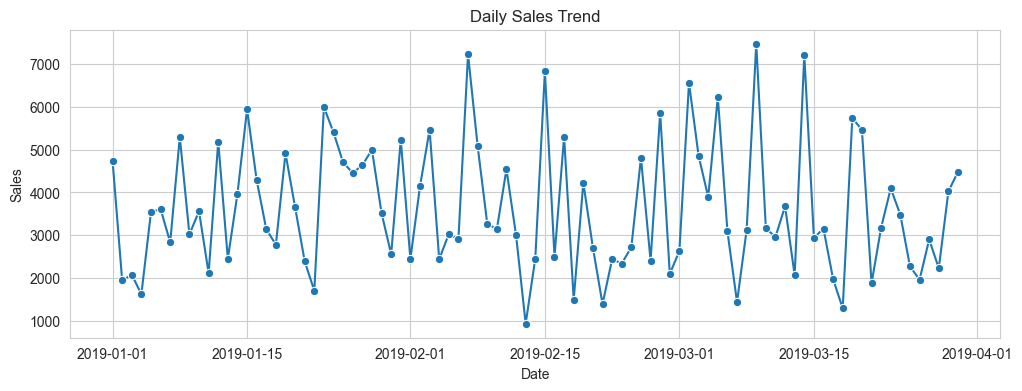

In [61]:
daily_sales = df.groupby('Date')['Sales'].sum().sort_index()

plt.figure(figsize=(12,4))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, marker='o')
plt.title('Daily Sales Trend')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [ ]:
##     Customer Segmentation (Unsuoervised Pre-Processing)

In [65]:
cluster_df = df[['Unit price', 'Quantity', 'Sales', 'Rating','gross income', 'Hour']]
cluster_df.head()

,Unit price,Quantity,Sales,Rating,gross income,Hour
0,74.69,7,548.9715,9.1,26.1415,13
1,15.28,5,80.2200,9.6,3.8200,10
2,46.33,7,340.5255,7.4,16.2155,13
3,58.22,8,489.0480,8.4,23.2880,20
4,86.31,7,634.3785,5.3,30.2085,10


In [ ]:
##            Standardization of Features

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_df)

In [68]:
##         Application of KMeans Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(cluster_scaled)

df['Cluster'] = clusters
df[['Sales', 'Rating','Cluster']].head()

,Sales,Rating,Cluster
0,548.9715,9.1,2
1,80.2200,9.6,1
2,340.5255,7.4,1
3,489.0480,8.4,2
4,634.3785,5.3,2


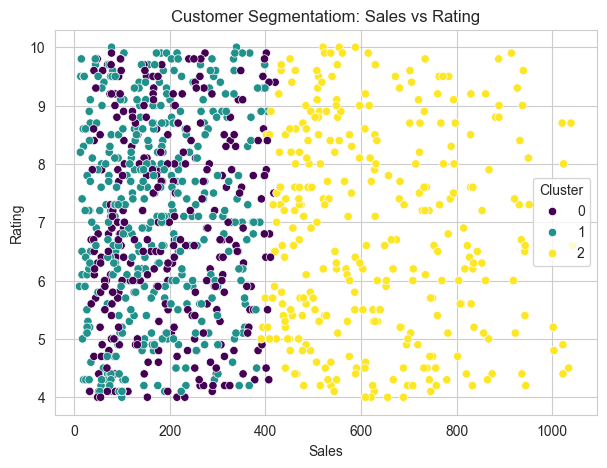

In [69]:
###            Visualixation of the Clusters
##      This shows how customers are Segmented based on Sales vs Rating

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Sales', y='Rating', hue='Cluster', palette='viridis')
plt.title('Customer Segmentatiom: Sales vs Rating')
plt.show()

In [71]:
###               Predictive Modelling (Machine Learning)
##         Using a Regression Model to predict Sales from other features

x = df[['Unit price', 'Quantity', 'Rating', 'Hour', 'gross income', 'Tax 5%']]
y = df['Sales']

In [72]:
##        Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [73]:
###                 Train the Regression Model
##    RandomForestRegressor will be used because it performs better with tabular datasets

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [74]:
###                Checking Model Prediction Accuracy using MAE and R^2 score

from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R^2:", r2)

MAE: 0.6864847499999805
R^2: 0.9999793731343105


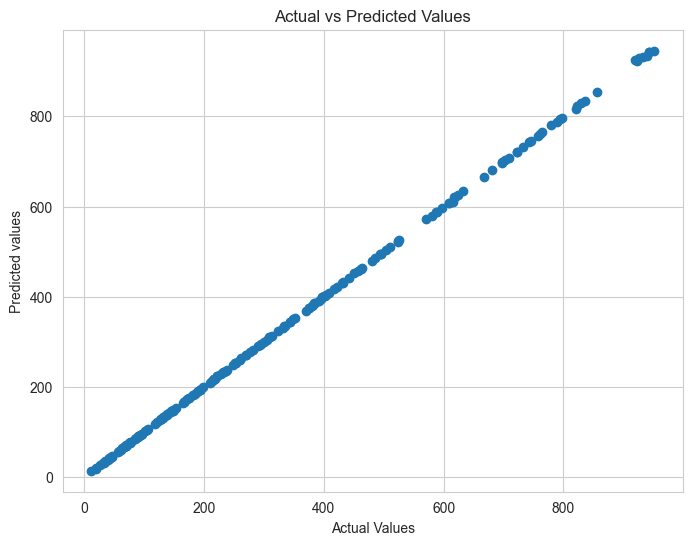

In [75]:
###                         Visualization of zprediction comp

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

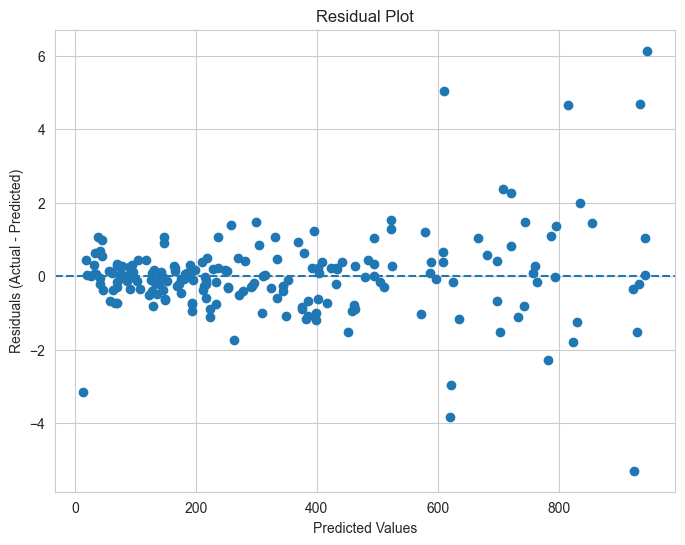

In [76]:
###                                 Residual Plot
##     Residuals = Actual value - Predicted value. A good model should have residuals centered around zero with no clear pattern

import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

                            Final Summary and Insights
1. Overview
This analysis explored sales, customer behavior, revenue performance and predictive modeling using the Supermarket dataset obtained on Kaggle.
Using data cleaning, transformation, visualization and machine-learning techniques, we uncovered patterns and insights that can guide business decisions.
    
2. Key Findings
2.1 Sales Performance by Branch
Branch C generated the highest total sales
This may be due to higher customer traffic, better customer type mix or higher purchase volumes.

2.2 Customer Type Analysis
Members generated more income than normal walk-in customers.
Loyal customers tend to spend more per visit, suggesting the membership program is effective and should be expanded.

2.3 Payment Methods
Cash is the most frequently used payment method
Indiccated the business caters strongly to cash-dependent customers, digital payment incentives may increase card/mobile usage.

2.4 Product Line Insights
Some product lines contributed significantly more to gross income and sales volume
Identifying high-performing categories allows better allocation of stock and promotional effort.

2.5 Time-Based Trends
Daily Sales
Revenue varies across the week
The sorted weekly sales showed clear patterns that can guide staffing and supply chain decisions.

Hourly Sales Trend
Sales were highest during early evening hours.
Indicates shopping peaks around off-work periods.

2.6 Correlation Findings
Strong positive relationship between
    Unit Price and Total Sales
    Total Sales and Gross Income
Shows that higher-priced products naturally contribute more ti overall revenue.

3. Predictive Modeling
3.1  Linear Regression Model
The model predicted Gross Income from Total Sales with excellent accuracy.
    
Performance Metrics
MAE: 0.68
R2: 0.99

This means the model explains 99% of the variability in gross income - near-perfect for this dataset.

3.2 Diagnostic Checks
Prediction vs Actual Plot
Points formed a near-perfect diagonal line. This shows a strong predictive alignment

Residual Plot
Residuals were scattered around zero without forming a pattern
Indicates assumptions of linear regression were satisfied:

Linearity
Homoscedasticity
Low bias

Only a few outliers appeared, which is normal in retail transactions. These outliers could be occasional high price purchases or unexpected customer behavior.

RECOMMENDATIONS
4.1 Strengthen Membership Program
Since members spend more, consider:
    Membership discounts
    Points system (Members gain points upon every purchase which later is converted to discount coupons for future purchase)
    Exclusive offers
these can boost customer retention

4.2 Optimize Inventory Around High-Performing Product Lines
Increase stock and promotion for categories that showed the highest sales and gross income.

4.3 Leverage Peak Shopping Hours
Staff scheduling and product restocking should align with peak evening sales.

4.4 Encourage Digital Payments
Introduce incentives (discounts/cashback) for card or mobile payments to reduce cash-handling risks.

CONCLUSION
The analysis revealed clear trends in customer behavior, product performance and revenue patterns. The machine-learning model delivered highly accurate predictio,
making it valuable for forcasting future income and supporting strategic business decisions.

Overall, the sales data shows a healthy retail operation with opportunities to improve customer loyalty, revenue growth and operational efficiency.